In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot  as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



In [5]:
model = models.Sequential([
    layers.Conv2D(110, (3,3), activation='relu', input_shape=(32, 32, 3)),  # Conv Layer
    layers.MaxPooling2D((2,2)),  # Pooling Layer
    layers.Conv2D(84, (3,3), activation='relu'),  # Another Conv Layer
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(90, (3,3), activation='relu'),

    layers.Flatten(),  # Converts features into a 1D vector
    layers.Dense(64, activation='relu'),  # Fully Connected Layer
    layers.Dense(10, activation='softmax')  # Output Layer (10 classes)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

In [7]:
model.fit(x_train, y_train, epochs=35, validation_data=(x_test, y_test))


Epoch 1/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3241 - loss: 1.8125 - val_accuracy: 0.5260 - val_loss: 1.3416
Epoch 2/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5602 - loss: 1.2498 - val_accuracy: 0.5917 - val_loss: 1.1454
Epoch 3/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6200 - loss: 1.0803 - val_accuracy: 0.6161 - val_loss: 1.0946
Epoch 4/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6579 - loss: 0.9706 - val_accuracy: 0.6581 - val_loss: 0.9946
Epoch 5/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6943 - loss: 0.8748 - val_accuracy: 0.6718 - val_loss: 0.9401
Epoch 6/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7164 - loss: 0.8145 - val_accuracy: 0.6742 - val_loss: 0.9340
Epoch 7/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7370 - loss: 0.7573 - val_accuracy: 0.6921 - val_loss: 0.8903
Epoch 8/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7525 - loss: 0.710

In [9]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6876 - loss: 1.8930


[1.9265987873077393, 0.6837999820709229]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


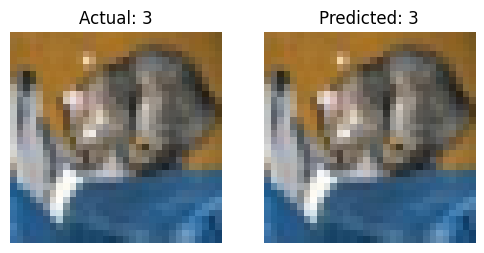

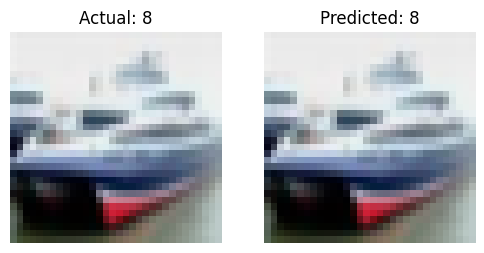

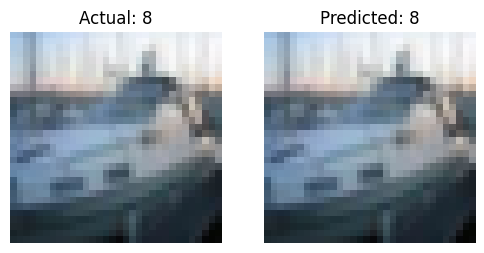

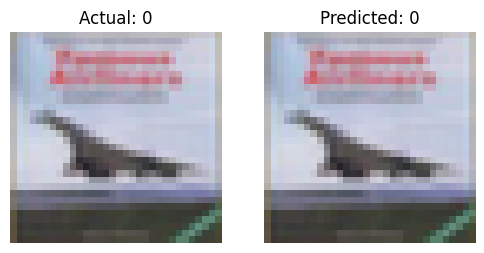

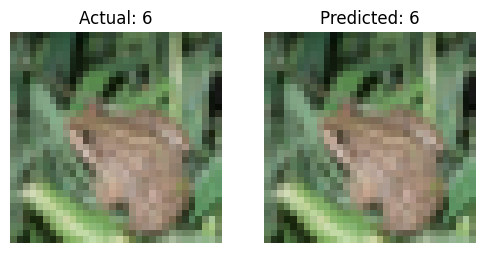

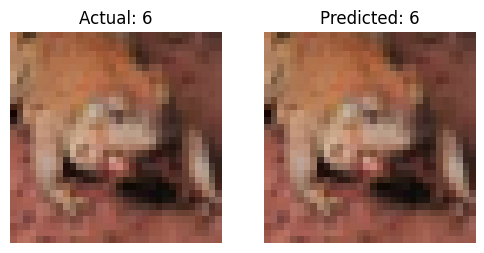

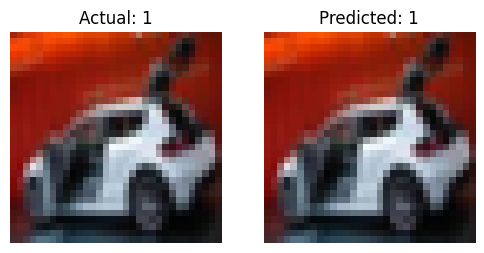

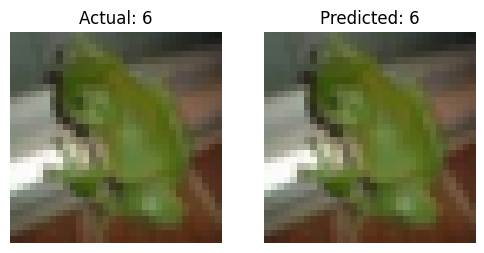

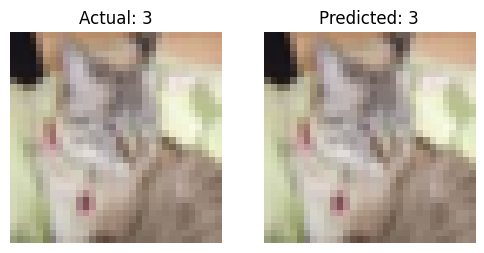

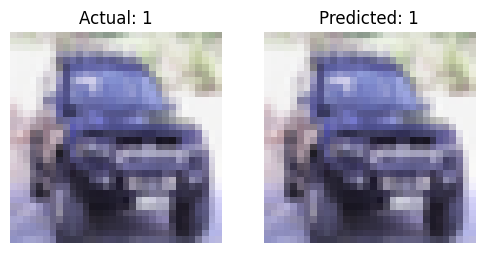

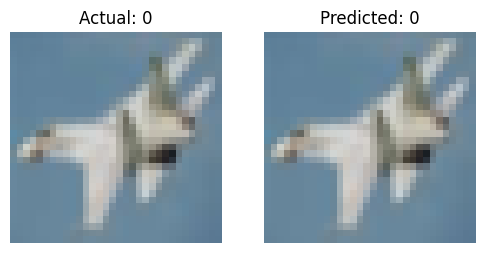

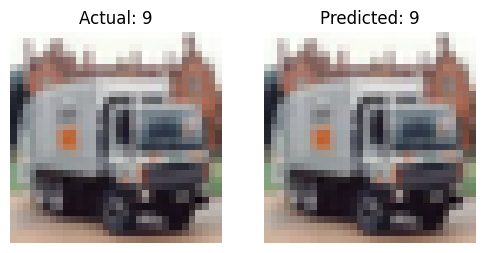

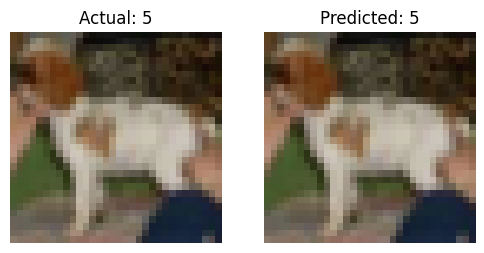

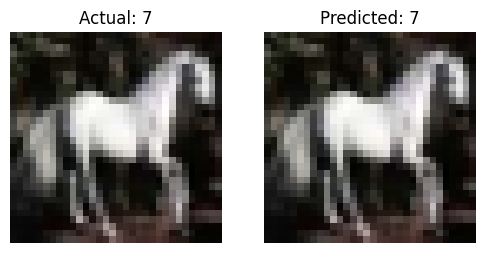

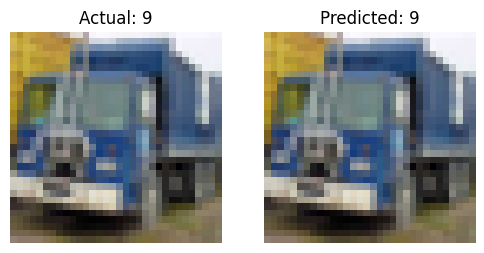

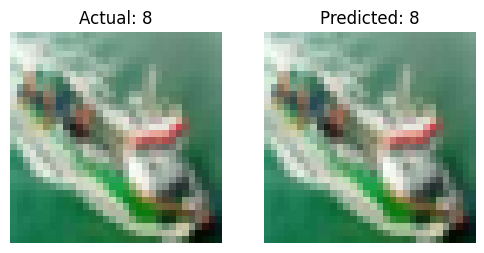

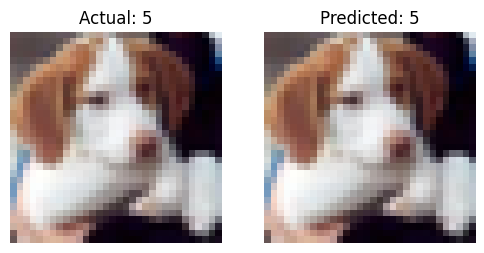

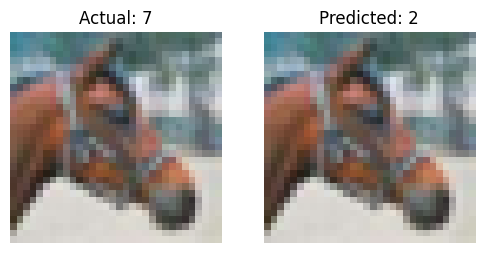

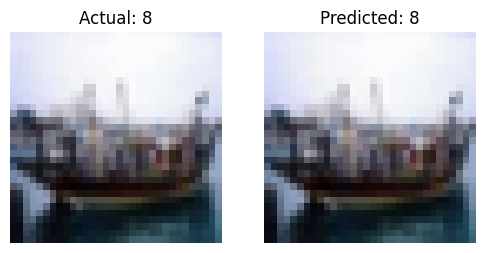

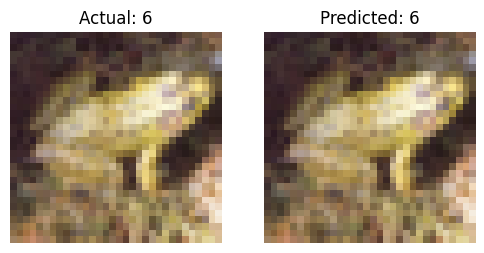

In [17]:

y_pred = model.predict(x_test)
y_pred_classes = [tf.math.argmax(element).numpy() for element in y_pred]

# Display the predicted vs actual for the first 20 images
for i in range(20):
  plt.figure(figsize=(6,3))
  plt.subplot(1, 2, 1)
  plt.imshow(x_test[i])
  plt.title(f"Actual: {y_test[i][0]}")
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(x_test[i])
  plt.title(f"Predicted: {y_pred_classes[i]}")
  plt.axis('off')

  plt.show()
